## SAS CODE

In [ ]:
/*problem1*/    
proc mixed data=growth covtest;  
class id gender (ref="2");  
model weight=Gender brthwtkg age  age*age / s influence(effect=id iter=10) residual   
outp=prout;  
repeated / subject=id R type=ar(1) rcorr;  
run;  
DATA growth2 ;  
SET growth;  
if id="1155" then delete;  
RUN;  
proc mixed data=growth2 covtest;  
class id gender (ref="2");  
model weight=Gender brthwtkg age  age*age / s influence(effect=id iter=10) residual   
outp=prout2;  
repeated / subject=id R type=ar(1) rcorr;  
run;  
/*problem2*/    
proc univariate data=prout normal;  
var Resid StudentResid PearsonResid;  
run;  
/*problem3*/    
data growth3;  
 set growth;  
 lnweight=log(weight);  
 run;  
 proc mixed data=growth3 covtest;  
class id gender (ref="2");  
model lnweight=Gender brthwtkg age  age*age / s influence(effect=id iter=10) residual   
outp=prout3;  
repeated / subject=id R type=ar(1) rcorr;  
run;  
proc univariate data=prout3 normal;  
var Resid StudentResid PearsonResid;  
run;  
/*problem4*/    
proc mixed data=growth covtest;  
class id gender (ref="2");  
model weight=Gender brthwtkg age  age*age / s influence(effect=id iter=10) residual   
outp=prout;  
repeated / subject=id R type=ar(1) rcorr;  
run;  

#### (1) (3 points) 請問 PRESS 最高的個案為？請自行計算出該個案的 PRESS，並與 SAS output 做比對。

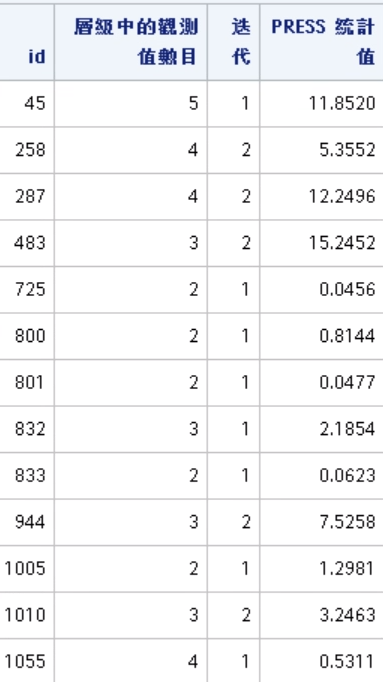
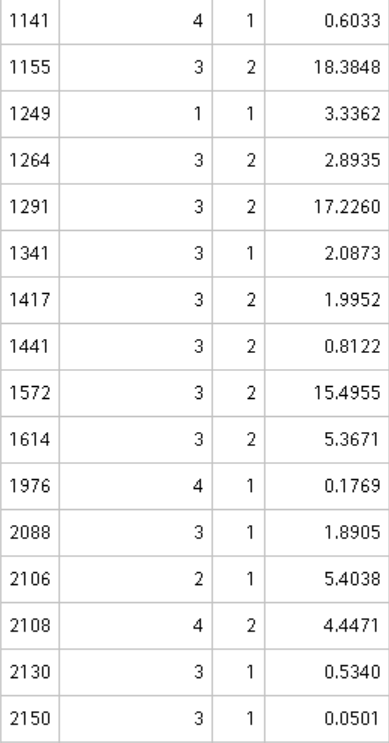
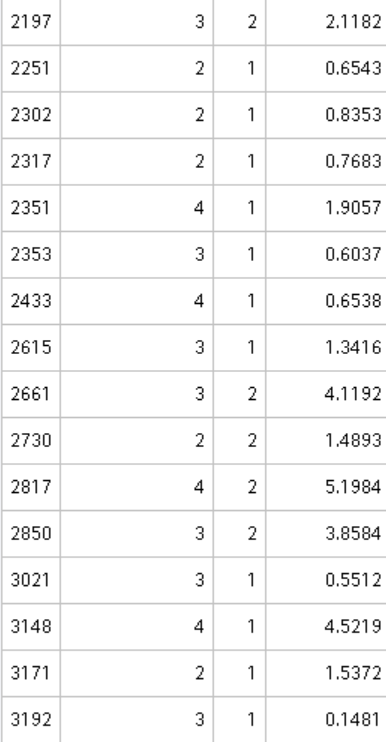
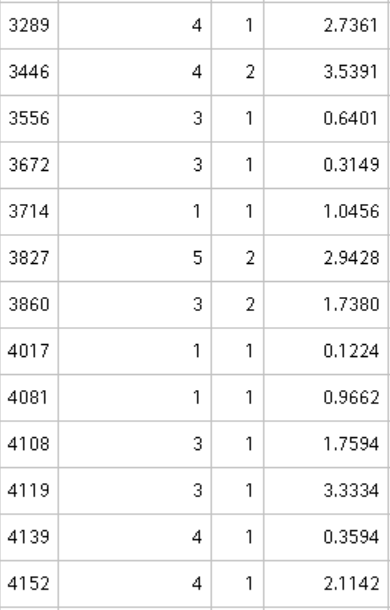
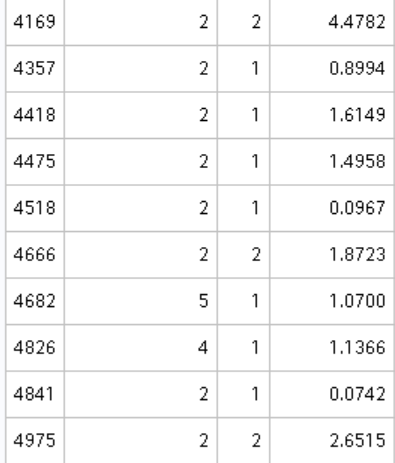

PRESS最高的個案為：id=1155，其PRESS=18.3848

刪除id1155後
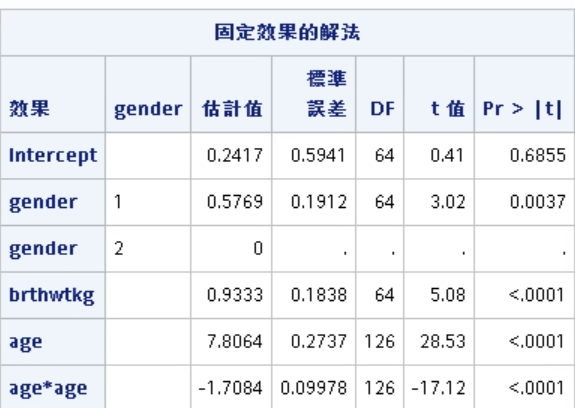

In [5]:
0.2417+0.5769+0.9333*3.65+7.8064*0.125941142-1.7084*0.125941142^2

[1] 5.181195

In [8]:
0.2417+0.5769+0.9333*3.65+7.8064*1.073237538-1.7084*1.073237538^2

[1] 10.63547

In [9]:
0.2417+0.5769+0.9333*3.65+7.8064*2.299794674-1.7084*2.299794674^2

[1] 13.14244

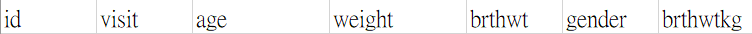
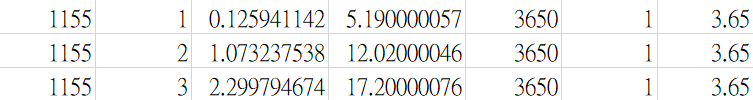

In [10]:
(5.190000057-5.18119470594827)^2+(12.02000046-10.6354650885613)^2+(17.20000076-13.1424396542062)^2

[1] 18.38082

計算出來的PRESS值幾乎和SAS算出來的相同。

#### (2) (2 points) 殘差是否呈常態分布？如果違反常態，請將 weight 取「自然對數」(natural log)轉換後重新配適模型。

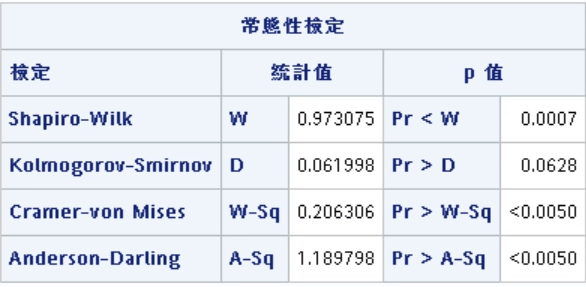
H0: 誤差呈常態分布  
H1: 誤差不呈常態分布  
依據Sharpiro-Wilk test，在顯著水準為0.05的情況下，我們拒絕誤差呈常態分布的虛無假說。

#### (3) (1 points) 重新配適模型後殘差是否呈常態分布？

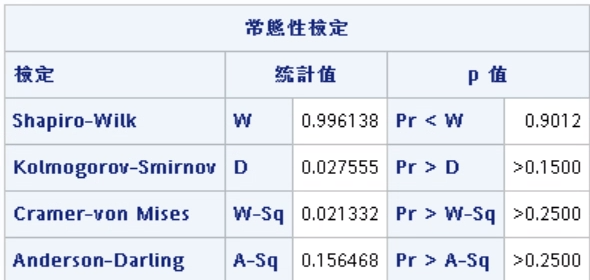
H0: 誤差呈常態分布  
H1: 誤差不呈常態分布  
依據Sharpiro-Wilk test，在顯著水準為0.05的情況下，我們沒有足夠的證據推翻誤差呈常態分布的虛無假說。

#### (4) (4 points) 請依本講義各步驟進行高影響力個案分析，是否發現任何可疑個案？

In [12]:
cook_D <- qf(0.5,5,198-5)
cook_D

[1] 0.8733461

臨界值：0.873346091094341  
對beta值而言，超過臨界值的高影響力個案id：無

In [13]:
cook_D <- qf(0.5,2,198-2)
cook_D

[1] 0.6956043

臨界值：0.695604260950812   
對CovParms值而言，超過臨界值的高影響力個案id：無

我認為在本題中，無論是對beta值或是CovParms，沒有人的MDFFITS特別大

本題也沒有COVRATIO接近0，或COVTRACE特別大的情況。  
所以我認為對於係數估計精確度沒有高影響力個案。

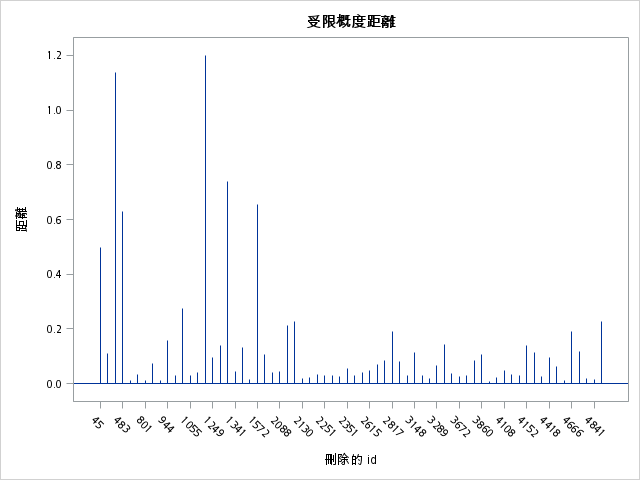  
若以restricted likelihood distance判斷，我認為id 287,1155可能是高影響力個案。